# Analysing iris dataset and classifying its flowers!


**Learning Outcomes**

At the end of this exercise you will be able to
1. *Load a dataset from the already avialble datasets in sklearn and familairise yourself with the dataset attributes*
2. *Train and plot a decision tree classifier with different depths on a dataset using sklearn*
3. *Split a dataset into testing and training*
4. *Apply the trained decision trees on a test set to obtain its confusion matrix*
5. *Visualise the dataset and gain insight via plotting different pairs of attributes*
6. *Train several decision trees on different pairs of attributes and plot their decision boundaries in 2d*


In this exercise we try to visualise and build a decision trees predictive classification ‎model for the IRIS dataset.

First we load required libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


## Load the iris Dataset

In [2]:
iris = load_iris()
print(iris.DESCR)         # uncomment to see a description of the iris dataset
# print(iris)               # uncomment to see the data

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Iris has 4 features and 3 classes, we want to classify the data into one of the following classes (categorical attribute)

In [3]:
print(iris.target_names) 

['setosa' 'versicolor' 'virginica']


Iris has the following attributes


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Data Visualisation

The following visualisation will take two attributes and use scatter plot to show the classes distribution in the iris. This is not a full picture of the data since there are 4 attributes and we are using only 2 attributes.

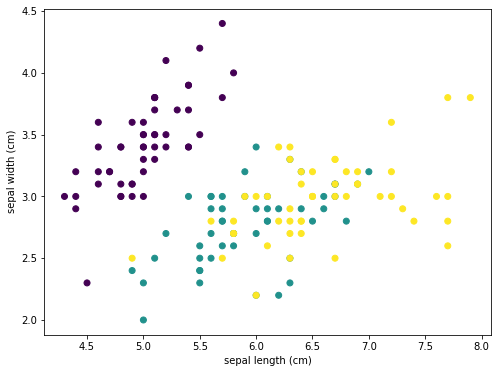

In [6]:
X = iris.data 
y = iris.target

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points using attributes att1 and att2
att1 = 0    # change these to see the effect on the visualisation
att2 = 1    # change these to see the effect on the visualisation
plt.scatter(X[:, att1], X[:, att2], c=y)

plt.xlabel(iris.feature_names[att1])
plt.ylabel(iris.feature_names[att2])
plt.show()

## Training a Decision Tree on the Entier Data (not recommended)
This is not recommended since any evaluation using the same dataset that we trained the model with is biased and even sometimes meaningless. Later we will see how we can train on a training set that is part of the original dataset 

Fit the classifier on the entire dataset, without splitting. This way we cannot evaluate! We need to rectify this later, so please be mindeful.

In [7]:
DT = DecisionTreeClassifier().fit(X, y)

Let us plot the tree that we obtained. We can isnpect the Gini index for each node since sklearn uses CART algorithm.

**Note that this tree is based on all attributes**

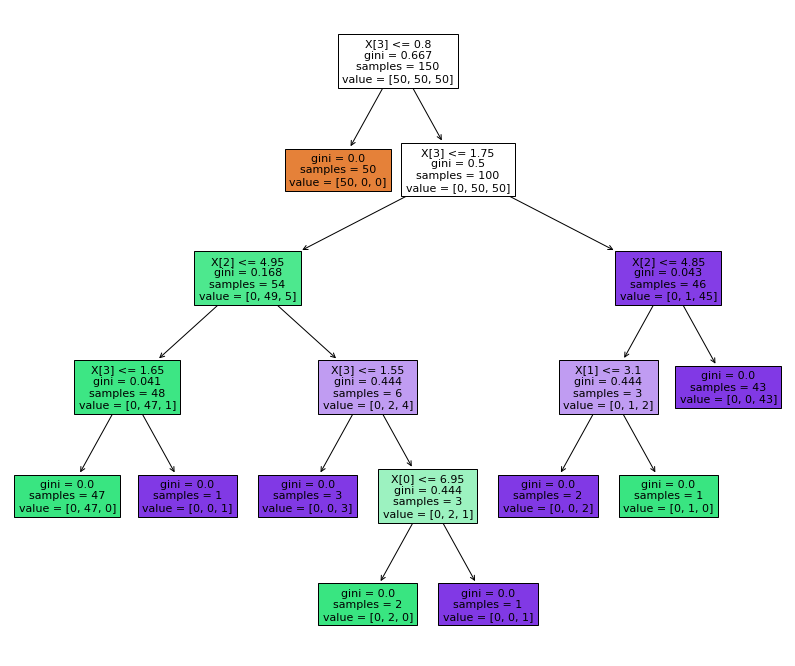

In [8]:
plt.figure(figsize=(14, 12))
plot_tree(DT, filled=True)
plt.show()

## Choosing pairs of attributes to build a corresponding decision tree

Let us build a set of Decision Trees each uses a different pairs of the attributes and see the effect by  visulaising the corresponding classifier decision boundaries

In [10]:
# Parameters
n_classes = len(iris.target_names)
points_colors = "ryb"
plot_step = 0.02

We want to enumerate through different pairs of attributes to be able to visualise the decision boundaries. However we can just use all the attributes to classify.

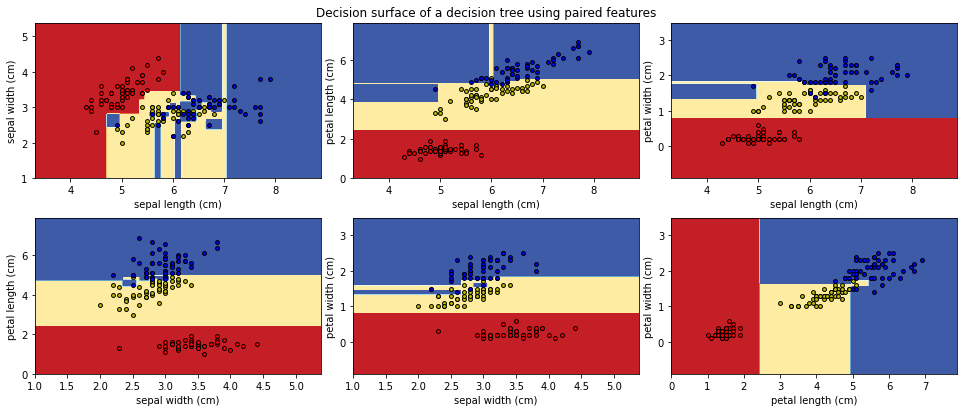

In [11]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

plt.figure(figsize=(14, 6))
# enumerate gives us all possible combinaitons of features (we have 4 features, so picking 2 our of 4 gives us 4!/(2!x2!) = 6 shown below
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    
    # We only take the two corresponding features at a time 
    X_ = iris.data[:, pair]  # this is different than original X which had all attributes
    y  = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X_, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    # we need to obtain the max and min for the two attributes that we are analysing in order to plot the decision boundaries
    x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
    y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])    
    
    # Plot the training points
    for i, color in zip(range(n_classes), points_colors):
        idx = np.where(y == i)
        plt.scatter(X_[idx, 0], X_[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")
plt.show()

## Training a Decision Tree on a Training set and Evaluating it on a Test Set (Recommended)

Ok after we gained more insights on the dataset and the classifiers for the different attributes pairs, we now need to do the proper job of splitting the data and *then* we train on one part and we test on the other part in order to obtain relaible results of it generalisaiotn and perfromance capabilities

Split for Training and Testing and plot the confusion matrix


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
DT = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

/Users/karan.verma/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


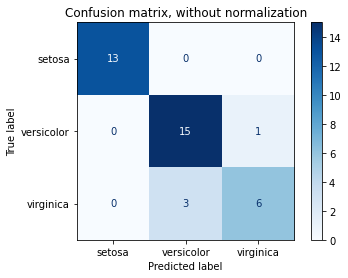

In [14]:
def apply(DT, X_test, y_test, normalised_conf=False):
    
    # Plot normalized and non-normalised confusion matrices
    if normalised_conf:    titles_options = [("Confusion matrix, with    normalization", 'true')]
    else:                  titles_options = [("Confusion matrix, without normalization", None)]

    # note that we are ploting for the testing set not for the training set
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(DT, X_test, y_test,
                                     display_labels=iris.target_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        print(title)
        print(disp.confusion_matrix)
        
    # plt.savefig('IRISConfusion.png')  # uncomment to save a figure on the notebook directory

apply(DT, X_test, y_test)    

/Users/karan.verma/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


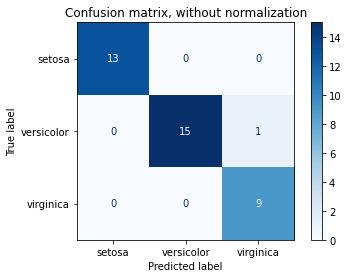

In [15]:
# Run classifier, using a model that is too regularized (C too low) to see the impact on the results
DT = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
apply(DT, X_test, y_test) 

### Print the Scores

In [16]:
np.set_printoptions(precision=2)    
print('Recall Scores')
print('%.3f'% recall_score(DT.predict(X_test),y_test,average='weighted'))
print('%.3f'% recall_score(DT.predict(X_test),y_test,average='macro'))
print(recall_score(DT.predict(X_test),y_test,average=None))
print('---------------------------------------')

print('Precision Scores')
print('%.3f'% precision_score(DT.predict(X_test),y_test,average='weighted'))
print('%.3f'% precision_score(DT.predict(X_test),y_test,average='macro'))
print(precision_score(DT.predict(X_test),y_test,average=None))
print('---------------------------------------')


Recall Scores
0.974
0.967
[1.  1.  0.9]
---------------------------------------
Precision Scores
0.975
0.979
[1.   0.94 1.  ]
---------------------------------------
